# Uber: Predicting the fare amount of future rides using regression analysis.

* The fare amount of a Uber ride is influenced by various factors such as distance, duration, traffic conditions, time of day, and demand. I am required  to develop a regression model that can predict the fare amount based on these factors. I will work with a dataset that includes historical ride data, including the fare amount and relevant features.

# Load and Explore the Dataset

##### Importing required libraries

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

##### Reading the csv file

In [4]:
df = pd.read_csv('uber.csv')

##### Checking the shape of the dataset

In [5]:
df.shape

(200000, 9)

###### 200000 Rows, 9 columns

##### First observation of dataset

In [6]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


##### Renaming the 'Unnamed: 0' colum to 'RIDE ID' column

In [7]:
df = df.rename(columns={'Unnamed: 0' : 'Ride ID'})
df.head(5)

,Ride ID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


##### Identifying types of variables

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Ride ID            200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


##### Understanding the data

In [9]:
df.describe()

,Ride ID,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


##### Converting 'key' and 'pickup_datetime' column to datetime

In [10]:
# both the columns 'key' and 'pickup_datetime' appear to be the same and are of the data type object.

df['key'] = pd.to_datetime(df['key'])
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

##### Extracting columns like year, month, dayofweek, and hour from the 'pickup_datetime' column.

In [11]:
#extracting 'year' column from the column 'pickup_datetime'
df['pickup_year']=df['pickup_datetime'].dt.year

#extracting 'month' column from the column 'pickup_datetime'
df['pickup_month']=df['pickup_datetime'].dt.month

#extracting 'dayofweek' column from the column 'pickup_datetime'
df['pickup_weekday']=df['pickup_datetime'].dt.dayofweek

#extracting 'hour' column from the column 'pickup_datetime'
df['pickup_hour']=df['pickup_datetime'].dt.hour

##### Calcualting distance column and its values using haversine method and columns 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', and, 'dropoff_latitude'.

In [12]:
import math

def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))

    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371

    return c * r

In [13]:
#applying haversine function in the column distance_km to calculate distance values in km.
df['distance_km'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

##### Checking the new 'distance_km' column

In [14]:
df

,Ride ID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,1.683323
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,2.457590
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,5.036377
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.000000530,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,0.112210
199996,16382965,2014-03-14 01:09:00.000000800,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,1.875050
199997,27804658,2009-06-29 00:42:00.000000780,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,12.850319
199998,20259894,2015-05-20 14:56:25.000000400,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,3.539715


# Handling Missing Data

##### Checking the null values

<Axes: >

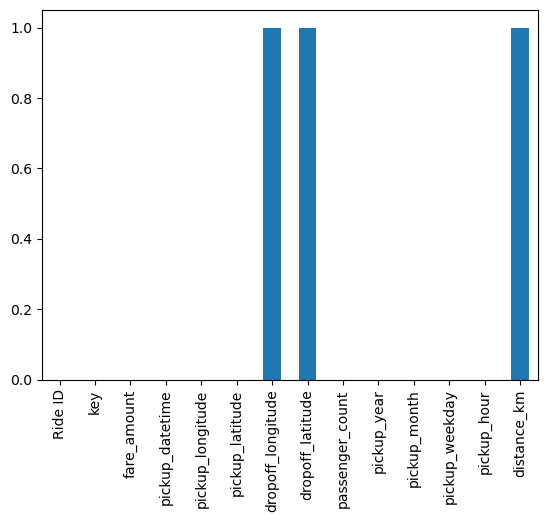

In [15]:
#visualizing the null values in the columns
df.isna().sum().plot(kind='bar')

* Since we have a significant amount of data of 200000 and there are only 1 each null values in columns 'dropoff_longitude', 'dropoff_latitude', & 'distance_km', so dropping the null values won't make much of a difference in model building.

##### Dropping the null values

In [16]:
#dropping null rows from the dataframe df
df.dropna(axis=0, inplace=True)
df.head()

,Ride ID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,1.683323
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,2.457590
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,5.036377
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,4.475450


<Axes: >

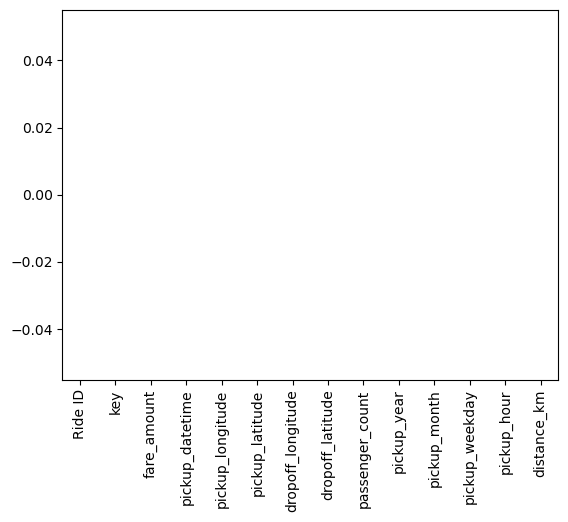

In [17]:
#again visualizing the null values in the columns
df.isna().sum().plot(kind='bar')

# Feature Engineering - I

##### Variable one: pickup_year

<Axes: xlabel='pickup_year', ylabel='count'>

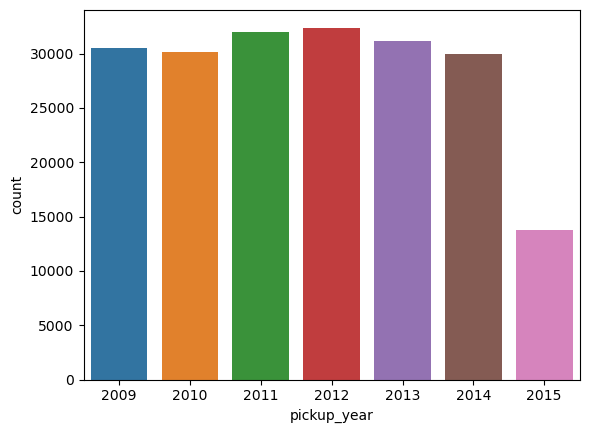

In [18]:
#exploring the distribution of number of uber rides based on the year from 2009 to 2015
sns.countplot(data=df, x='pickup_year')

* From the above bar plot we can see that in the years 2011, 2012, and 2013 the number of uber rides was maximum. Similarly, in the year 2015 the number of uber rides reduced drastically.

##### Variable two: pickup_month

[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

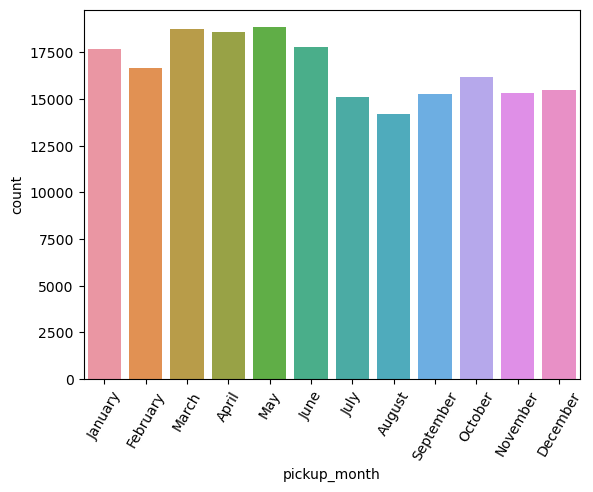

In [19]:
#exploring the distribution of number of uber rides based on the month from January - December
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September', 'October', 'November', 'December']
ax1 = sns.countplot(data=df, x='pickup_month')
ax1.set_xticklabels(months, rotation = 60)

* From the above bar plot we can observe that in the months of March, April, and May, there are maximum number of uber rides. Similarly, in the months of July, August, September, October, November, and December there are least number of uber rides in comparision to other months.

In [20]:
#mapping the numerical values to the labelled month names
df.loc[:,'pickup_month'] = df['pickup_month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [21]:
#categorizing months based on the season
def month(pickup_month):
    if pickup_month == 'December' or pickup_month == 'January' or pickup_month == 'February':
        return 'Winter'
    elif pickup_month == 'March' or pickup_month == 'April' or pickup_month == 'May':
        return 'Spring'
    elif pickup_month == 'June' or pickup_month == 'July' or pickup_month == 'August':
        return 'Summer'
    else:
        return 'Autumn'

df.loc[:,'pickup_month'] = df['pickup_month'].apply(lambda x: month(x))

* Categorizing 12 months into Winter, Spring, Summer, and Autumn to narrow down the levels and intervals in the 'pickup_month' variable.

<Axes: xlabel='pickup_month', ylabel='count'>

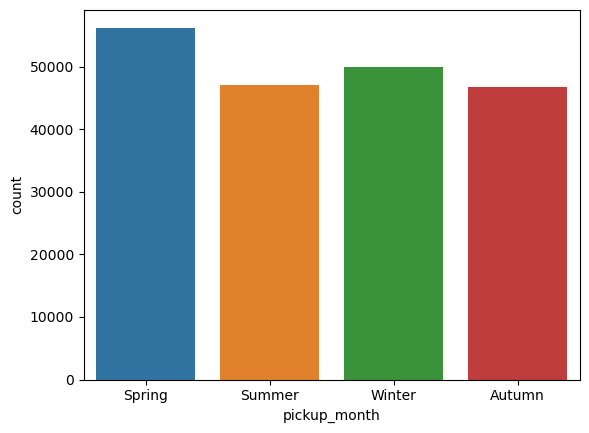

In [22]:
#exploring the distribution of number of uber rides based on the season
sns.countplot(data=df, x='pickup_month')

* From the bar plot we can see that in the Spring season particularly there are more number of uber rides in comparision with other seasons.

In [23]:
#mapping the categorical values of 'pickup_month' column to numerical for correlation heatmap plotting.
df.loc[:,'pickup_month'] = df['pickup_month'].map({'Winter':1,'Summer':2, 'Spring':3, 'Autumn':4})

In [24]:
df['pickup_month'] = df['pickup_month'].astype(int)

##### Variable three: pickup_weekday

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

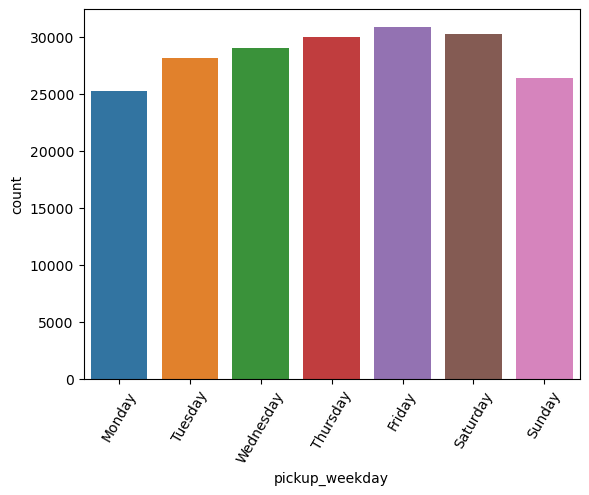

In [25]:
#exploring the distribution of number of uber rides based on the weekdays from Monday - Sunday
week_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ax2 = sns.countplot(data=df, x='pickup_weekday')
ax2.set_xticklabels(week_days, rotation = 60)

* From the above weekday bar plot we can see that mainly in the days of Thursday, Fruday, and Saturday there are more uber rides. Similarly, in the days of Sunday, Monday, Tuesday, and Wednesday there are comparatively less number of uber rides.

##### Variable four: pickup_hour

<Axes: xlabel='pickup_hour', ylabel='count'>

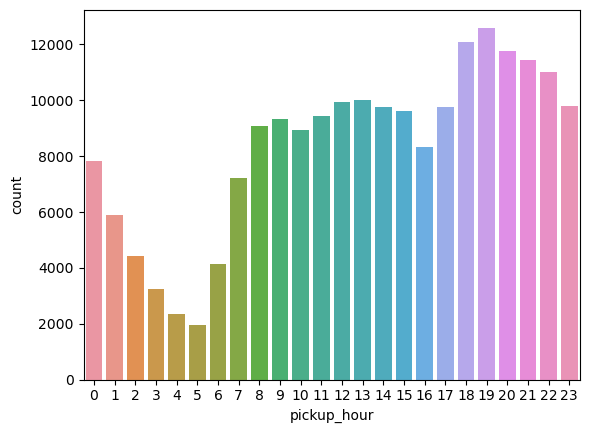

In [26]:
#exploring the distribution of number of uber rides on the hourly basis from 0:00 am till 23:59 pm
sns.countplot(data=df, x='pickup_hour')

* From the 'pickup_hour' variable bar plot we can see that between the hours of 12 am till 6 am there are less number of uber rides. Similarly, when the clock hits 7 am the number of uber rides starts to rise up and remain constant till the hour mark of 6 pm (18 pm). However, between the hours of 7 pm (19 pm) and 10 pm (22 pm) the number of uber rides increases to maximum and again slowly starts to come down when the clock hits the hour mark of 11 pm (23 pm). 

In [27]:
#categorizing hours based on the timely interval of 3 hours
def hour_day(pickup_hour):
    if pickup_hour == 0 or 0 < pickup_hour < 3:
        return 'Midnight_Owl'
    elif pickup_hour == 3 or 3 < pickup_hour < 6:
        return 'Early_Bird'
    elif pickup_hour == 6 or 6 < pickup_hour < 9:
        return 'Sunrise_Shift'
    elif pickup_hour == 9 or 9 < pickup_hour < 12:
        return 'Morning_Rush'
    elif pickup_hour == 12 or 12 < pickup_hour < 15:
        return 'Noon_Tide'
    elif pickup_hour == 15 or 15 < pickup_hour < 18:
        return 'Afternoon_Glide'
    elif pickup_hour == 18 or 18 < pickup_hour < 21:
        return 'Evening_Breeze'
    elif pickup_hour == 21 or 21 < pickup_hour <= 23:
        return 'Nightfall_Nooka'

        
df.loc[:,'pickup_hour'] = df['pickup_hour'].apply(lambda x: hour_day(x))

* Categorizing the 'pickup_hour' variable in the timely interval of 3 hours. Initially the total number of levels and categories was 24, however after categorizing it the total number of levels and categories is 8. Reducing the time interval will allow the uber drivers to get better idea about which time intervals in a day are preferable for them to get more uber passengers.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Evening_Breeze'),
  Text(1, 0, 'Nightfall_Nooka'),
  Text(2, 0, 'Sunrise_Shift'),
  Text(3, 0, 'Afternoon_Glide'),
  Text(4, 0, 'Midnight_Owl'),
  Text(5, 0, 'Noon_Tide'),
  Text(6, 0, 'Morning_Rush'),
  Text(7, 0, 'Early_Bird')])

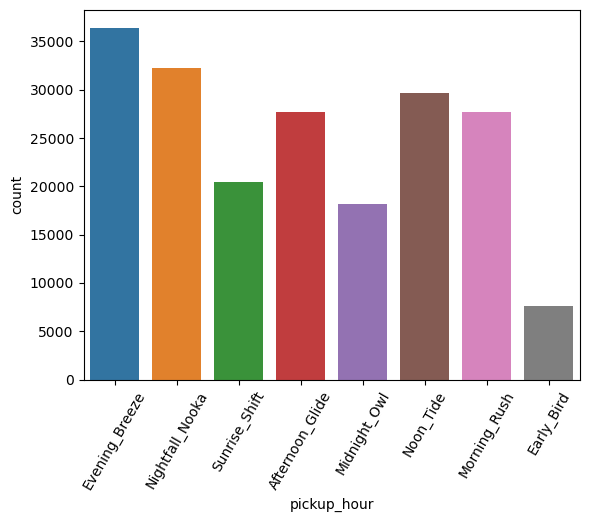

In [28]:
#exploring the distribution of number of uber rides based on the timely interval of 3 hours
sns.countplot(data=df, x='pickup_hour')
plt.xticks(rotation=60)

* From the abover bar plot of variable 'pickup_hour' it is seen that in the time interval of Evening_Breeze (i.e. between 6 pm (18 pm) and 9 pm (21 pm) there are maximum uber rides. Similarly in the time interval of Early_Bird (i.e. between 3 am and 6 am there are lowest uber rides.

In [29]:
#mapping the categorical values of 'pickup_hour' column to numerical for correlation heatmap plotting.
df.loc[:,'pickup_hour']= df['pickup_hour'].map({'Evening_Breeze':0,'Nightfall_Nooka':1,'Sunrise_Shift':2, 'Afternoon_Glide':3, 'Midnight_Owl':4, 'Noon_Tide':5, 'Morning_Rush':6, 'Early_Bird':7})

In [30]:
df['pickup_hour'] = df['pickup_hour'].astype(int)

# Handling Outliers

* It is very important to handle outliers in a dataset and treat them accordingly via methods of labeling or dropping them. This will ensure that the model built in the further model building phase will be accurate.

In [31]:
#Checking out the minimum value of the column 'fare_amount'
df['fare_amount'].min()

-52.0

In [32]:
#checking out the maximum value of the column 'fare_amount'
df['fare_amount'].max()

499.0

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

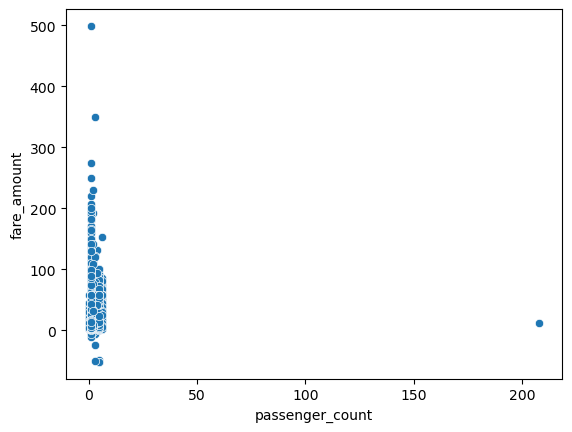

In [33]:
#plotting a scatter plot of columns 'passenger_count' & 'fare_amount'
sns.scatterplot(data=df, x='passenger_count', y='fare_amount')

In [34]:
#checking which row has a 'passenger_count' column value more than 200
df.query('passenger_count > 200')

,Ride ID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
113038,35893772,2010-12-28 08:20:00.000000100,11.7,2010-12-28 08:20:00+00:00,-73.937795,40.758498,-73.937835,40.758415,208,2010,1,1,2,0.009825


In [35]:
#keeping only those rows whose values in the column 'passenger_count' is less than 200
df = df[df['passenger_count']<200]

In [36]:
#displaying df dataframe to verify the filtration
df

,Ride ID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,3,0,1.683323
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,2,4,0,2.457590
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,2,0,1,5.036377
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,2,4,2,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,2,3,3,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.000000530,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,4,6,6,0.112210
199996,16382965,2014-03-14 01:09:00.000000800,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,4,1.875050
199997,27804658,2009-06-29 00:42:00.000000780,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,2,0,4,12.850319
199998,20259894,2015-05-20 14:56:25.000000400,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,3,2,5,3.539715


<Axes: xlabel='passenger_count', ylabel='fare_amount'>

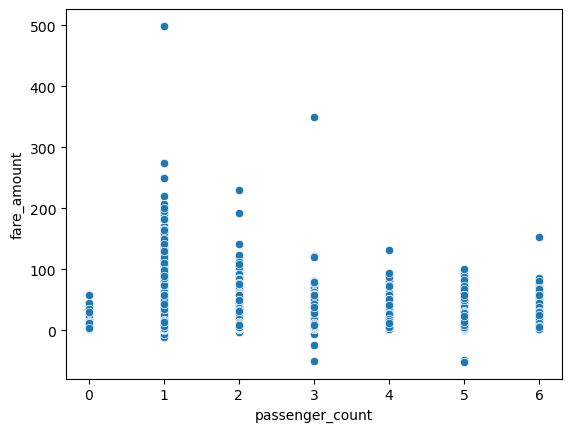

In [37]:
#again plotting a scatter plot of columns 'passenger_count' & 'fare_amount'
sns.scatterplot(data=df, x='passenger_count', y='fare_amount')

#### Dropping the unnecessary variables

In [38]:
df = df.drop(['pickup_datetime', 'Ride ID', 'key'],axis = 1)

##### Box Plot

* Box plot gives you an overview picture of which columns in particular have outliers in them.

<Axes: >

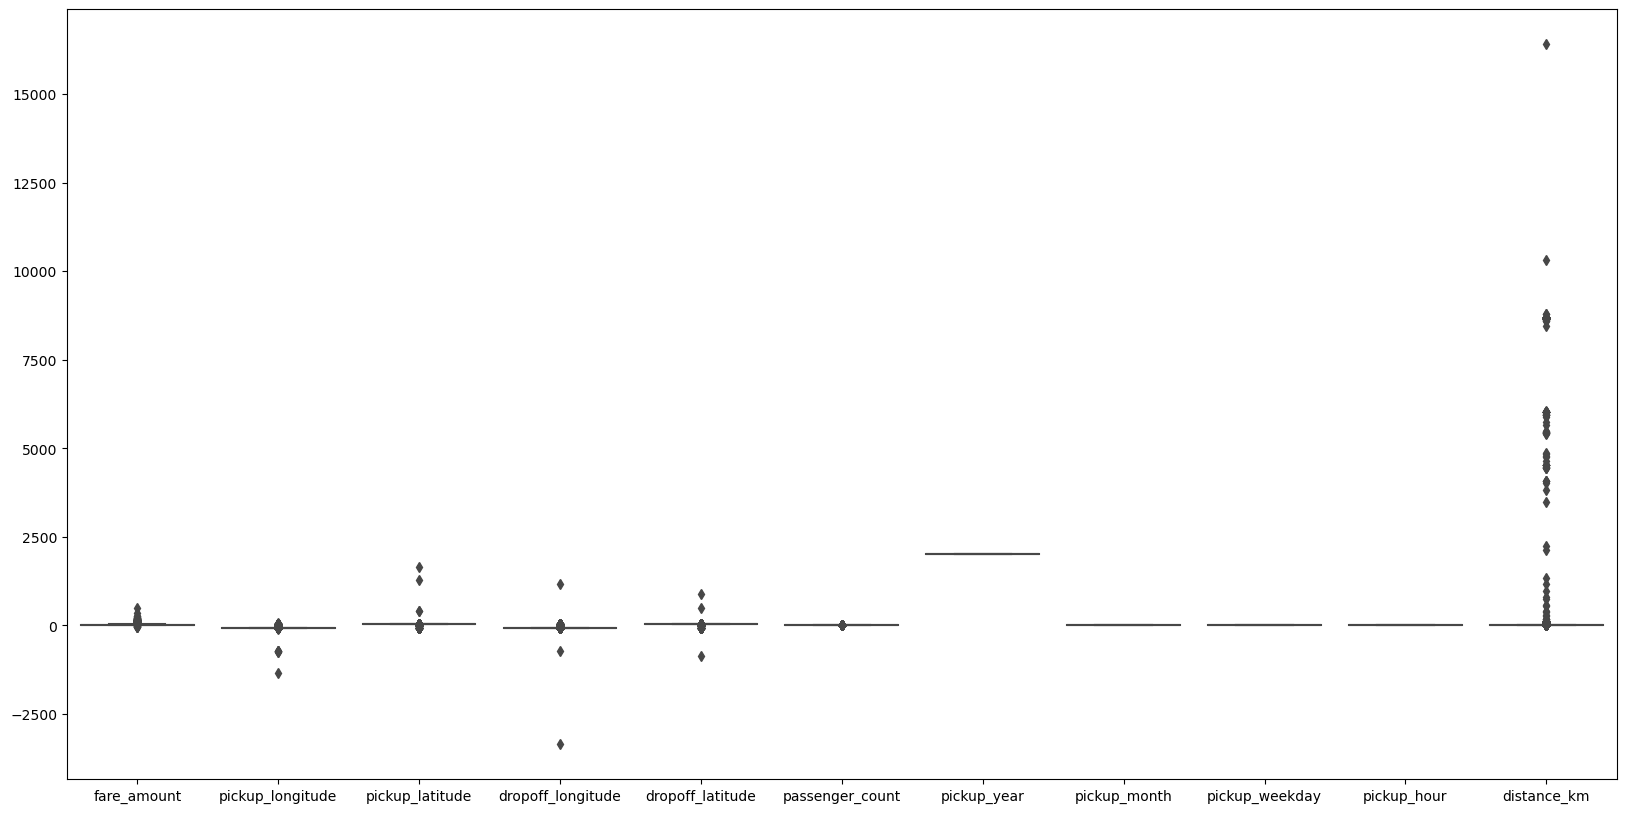

In [39]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199998 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199998 non-null  float64
 1   pickup_longitude   199998 non-null  float64
 2   pickup_latitude    199998 non-null  float64
 3   dropoff_longitude  199998 non-null  float64
 4   dropoff_latitude   199998 non-null  float64
 5   passenger_count    199998 non-null  int64  
 6   pickup_year        199998 non-null  int32  
 7   pickup_month       199998 non-null  int64  
 8   pickup_weekday     199998 non-null  int32  
 9   pickup_hour        199998 non-null  int64  
 10  distance_km        199998 non-null  float64
dtypes: float64(6), int32(2), int64(3)
memory usage: 16.8 MB


In [41]:
#selecting all the numeric_columns from the dataframe 'df' and storing it in a new dataframe called 'numeric_columns'
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

In [42]:
df.shape

(199998, 11)

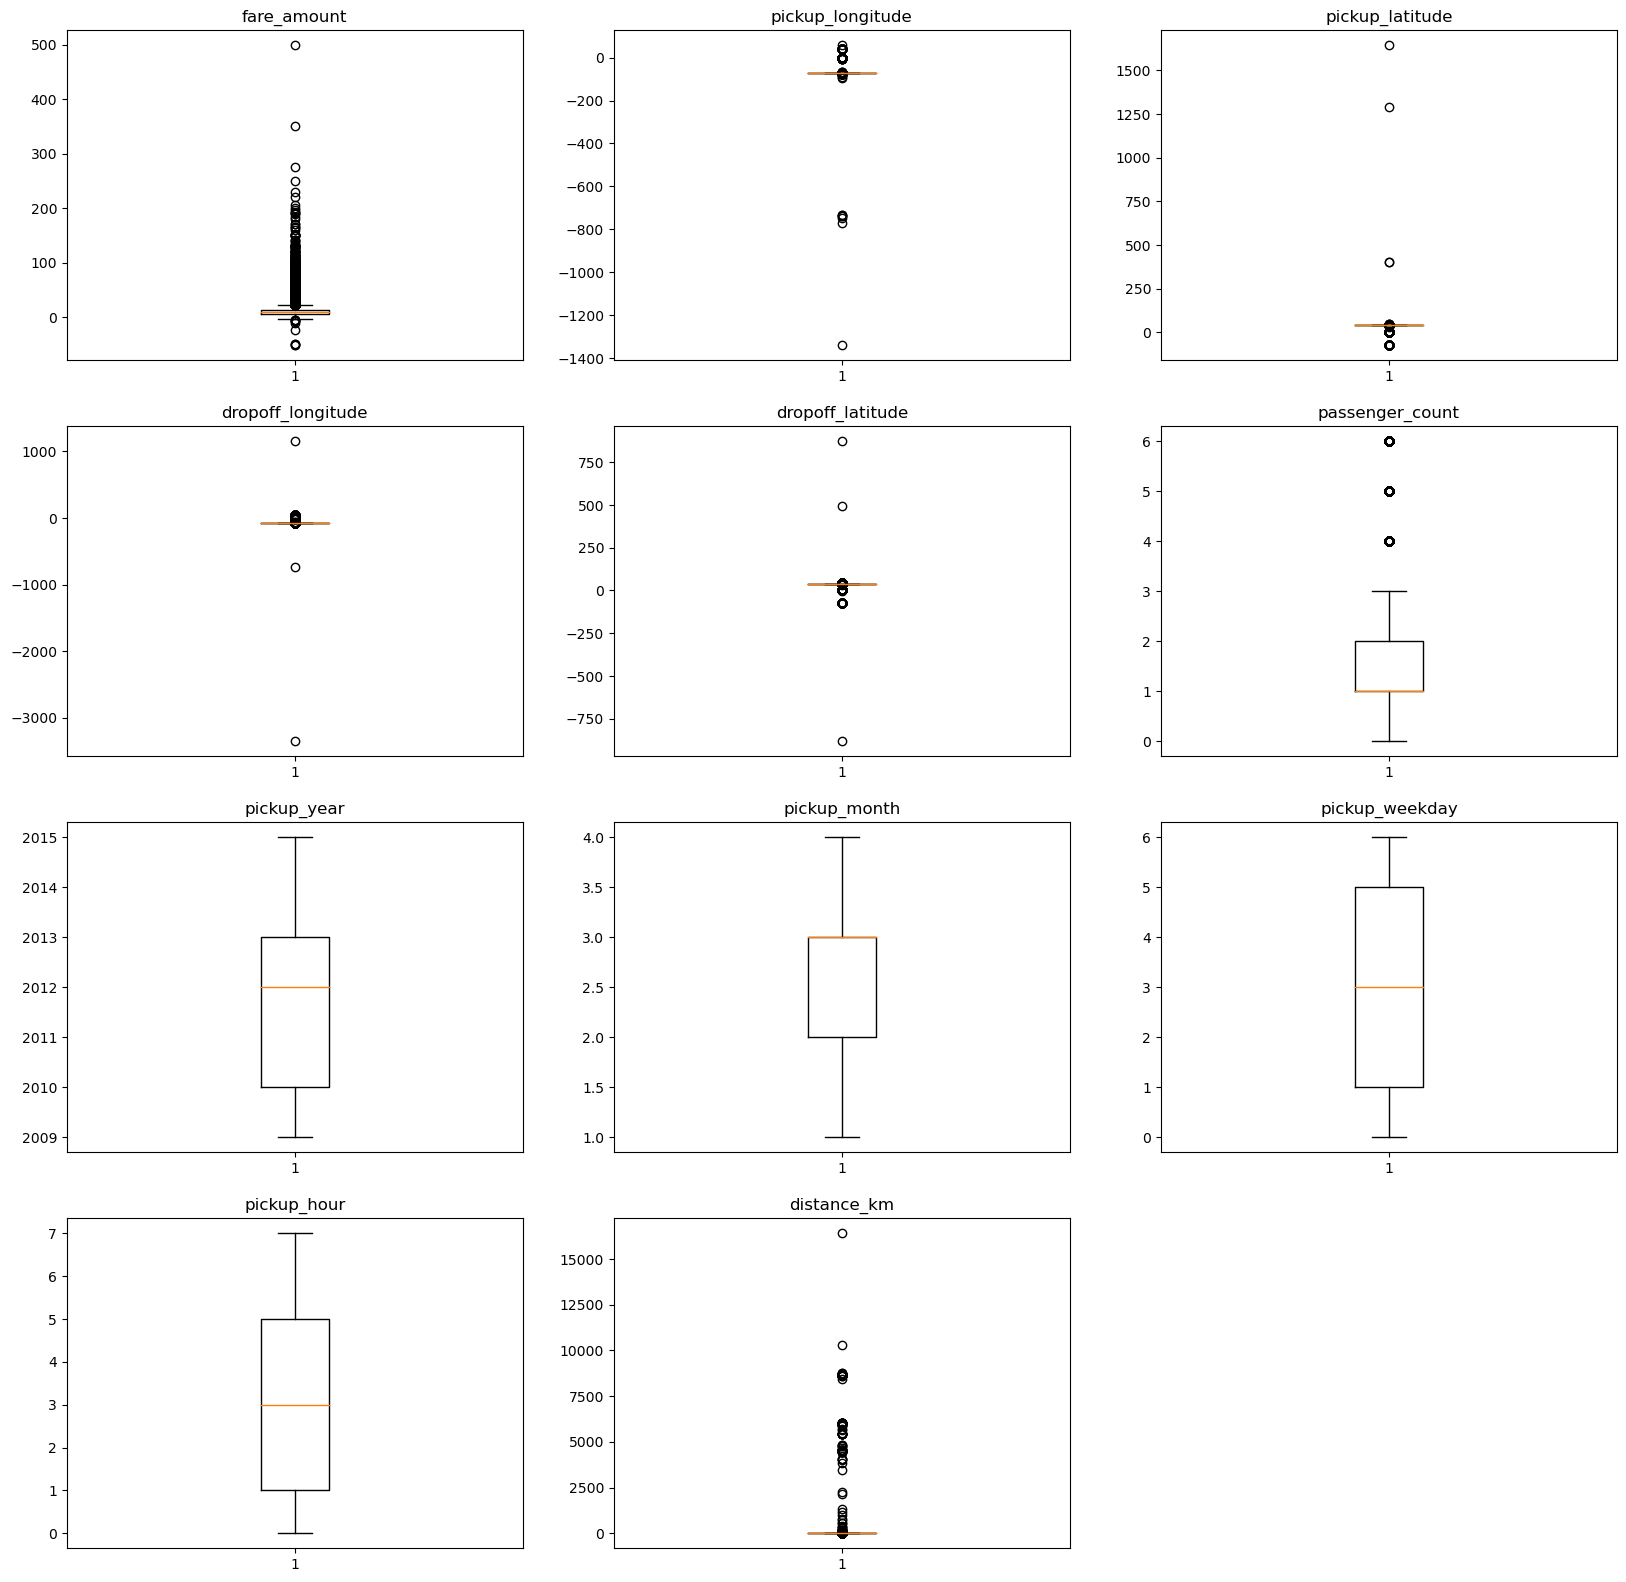

In [43]:
#plotting boxplot for all individual numerical columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.title(variable)
    
plt.show()

* The Interquartile Range (IQR) is a measure of statistical dispersion, which is the spread or range of a dataset. Specifically, the IQR is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. These percentiles are key markers in a dataset:

- **Q1 (25th percentile)**: This is the value below which 25% of the data falls. It marks the lower quarter of the data.
- **Q3 (75th percentile)**: This is the value below which 75% of the data falls. It marks the upper quarter of the data.

* The IQR is essential for identifying and handling outliers in a dataset. Outliers are data points that are significantly different from most other data points, and they can distort statistical analyses. By using the IQR, we can establish boundaries (lower and upper whiskers) to determine which data points are too far from the central tendency (either too low or too high) and are considered outliers. This approach is robust against outliers and helps in ensuring the data's integrity for further analysis. 

* In the function `remove_outlier`, the lower whisker is set at Q1 minus 1.5 times the IQR, and the upper whisker is set at Q3 plus 1.5 times the IQR. Data points beyond these whiskers are considered outliers and are clipped to these whisker values, thereby treating the outliers.

In [44]:
# remove_outlier function to remove outliers by calculating IQR from Q1 and Q3 for each individual numerical columns.
def remove_outlier(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df1.loc[:, col] = np.clip(df1[col], lower_whisker, upper_whisker)
    return df1

# 'treat_outliers_all' function to treat outliers in all columns
def treat_outliers_all(df1, col_list):
    for c in col_list:
        df1 = remove_outlier(df1, c)
    return df1

In [45]:
# applying outlier treatment to the DataFrame
df = treat_outliers_all(df, numeric_columns)

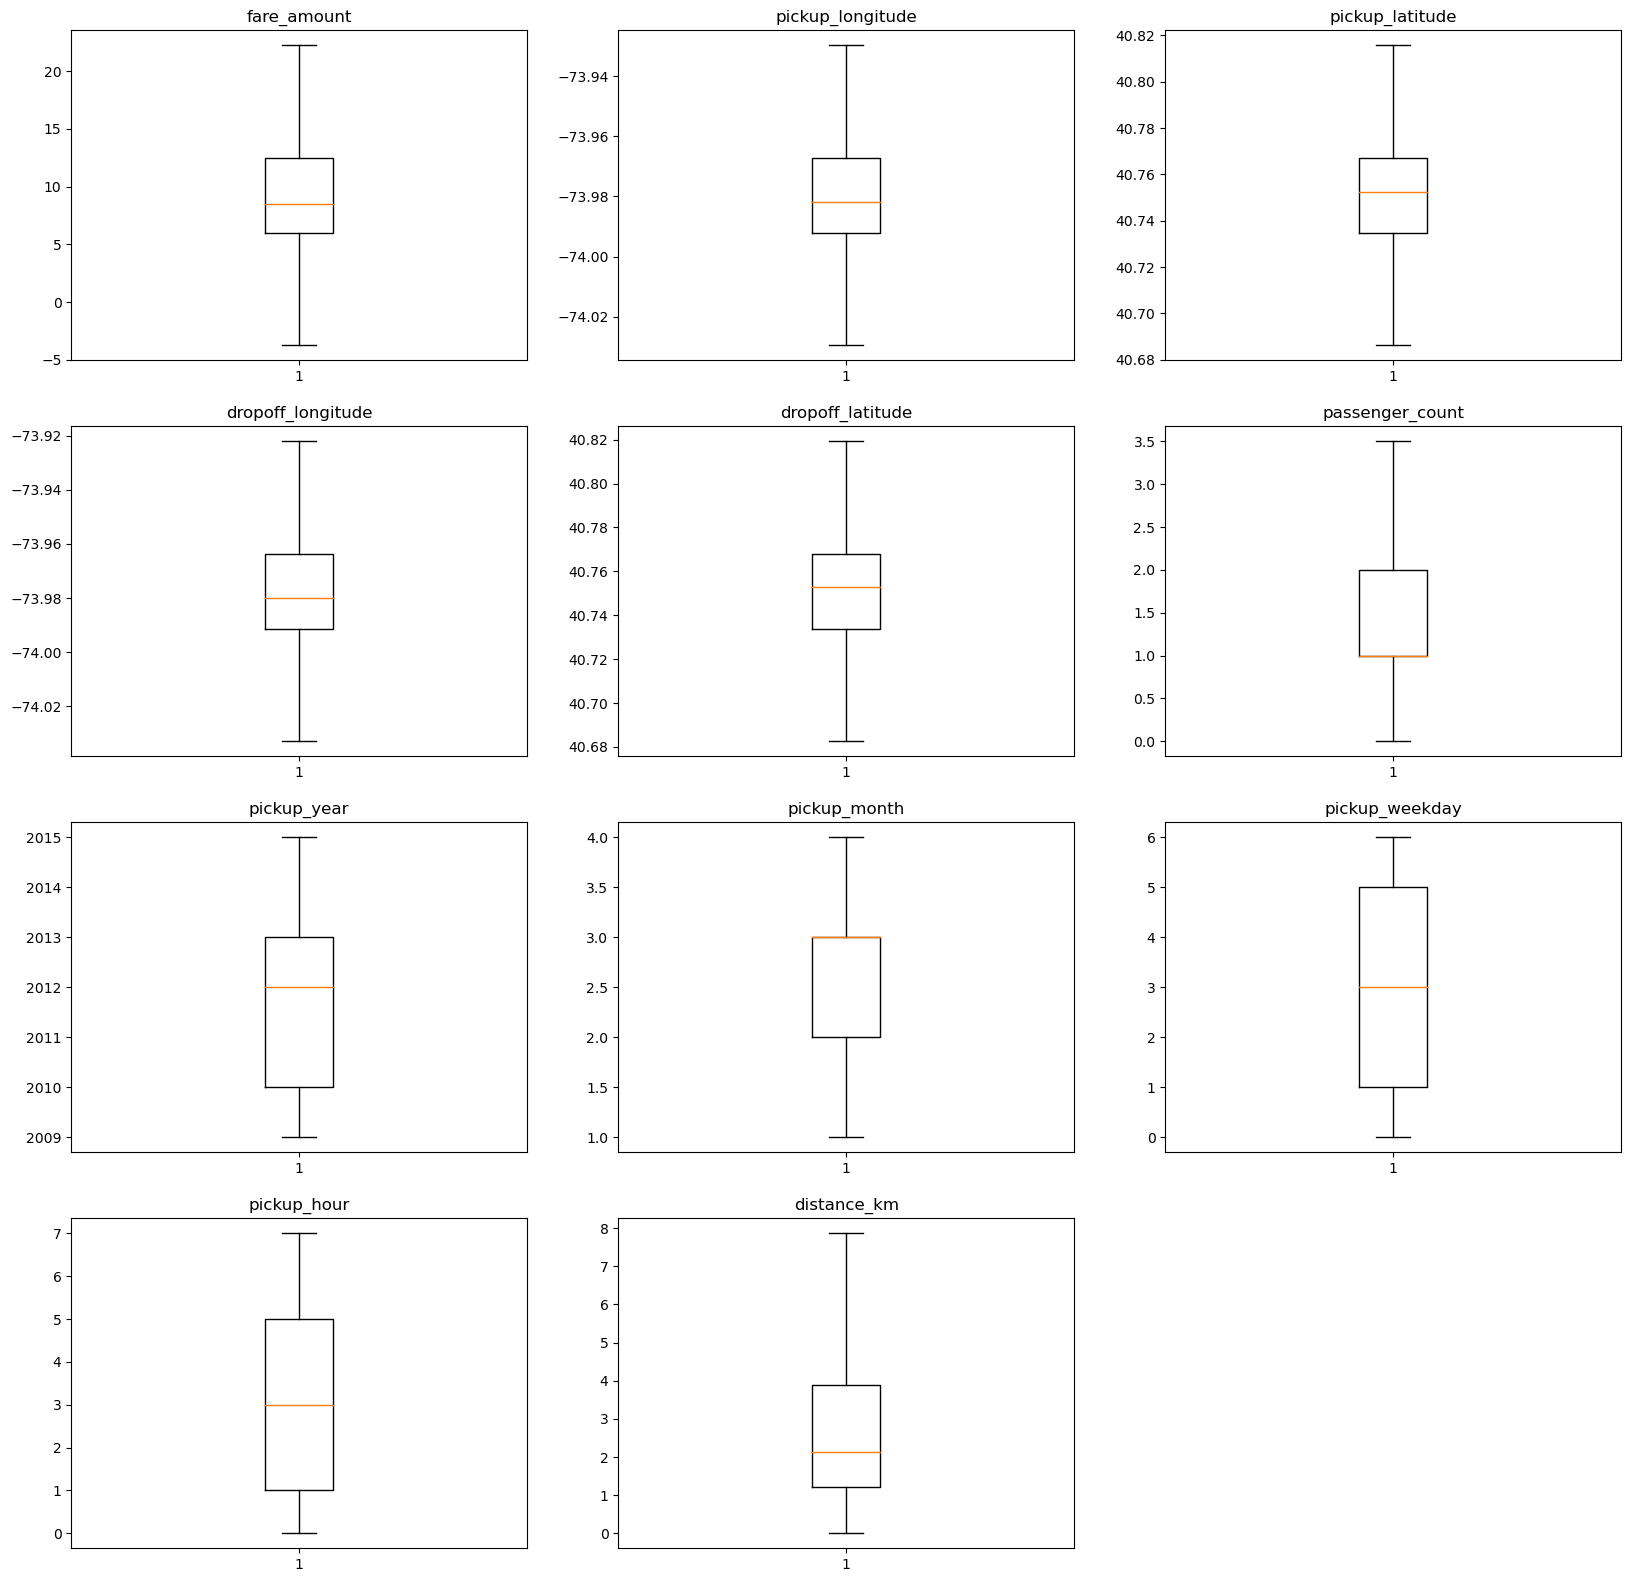

In [46]:
#again plotting boxplot for all individual numerical columns to check for any remaining outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.title(variable)
    
plt.show()

##### Checking the shape of the dataset

In [47]:
df.shape

(199998, 11)

# Feature Engineering - II

##### Target Variable: Fare Amount

<Axes: xlabel='fare_amount', ylabel='Count'>

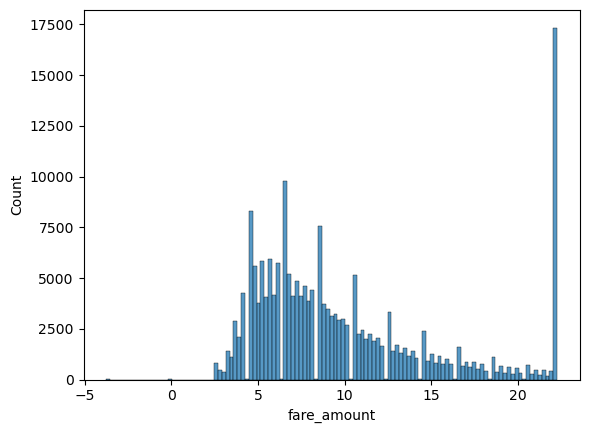

In [48]:
sns.histplot(df['fare_amount'])

* Looking at the histplot of our target variable 'fare_ammount' it can be seen that there are some negative values as well. As far as I know the fare_amount cannot be in negative, so we select the positive values only.

In [49]:
#We will only keep the observation where fare is positive
df = df.loc[(df.fare_amount >= 0)]

In [50]:
df.shape

(199981, 11)

<Axes: xlabel='fare_amount', ylabel='Count'>

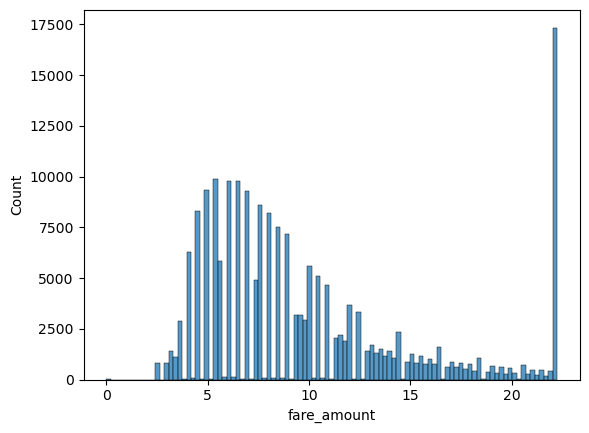

In [51]:
sns.histplot(df['fare_amount'])

* Looking at the histplot again there are some values that are between 0 and 2.5. We will again remove these value and select the values of fare_amount that are greater than 2.5

In [52]:
#We will only keep the observation where fare is greater thatn 2.5
df = df.query('fare_amount > 2.5')

<Axes: xlabel='fare_amount', ylabel='Count'>

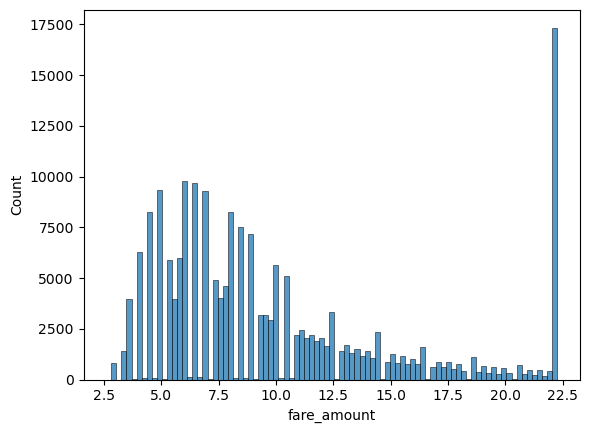

In [53]:
sns.histplot(df['fare_amount'])

In [54]:
df.shape

(199148, 11)

##### Variable five: distance_km

<Axes: xlabel='distance_km', ylabel='Count'>

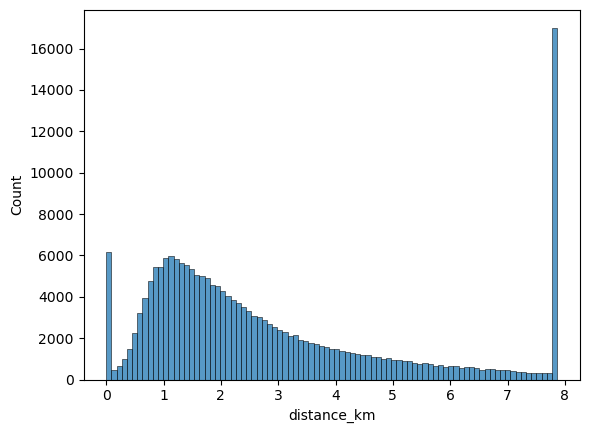

In [55]:
sns.histplot(df['distance_km'])

* Looking at the 'distance_km' variable we can see there are some distance values that are 0. Since, these values are calculated above and the value of 0 might affect the correlation matrix and model building, we select the distance_km values that are greater than 0.

In [56]:
df.shape

(199148, 11)

In [57]:
df = df.query('distance_km > 0.0')

In [58]:
df.shape

(193718, 11)

* After taking distance_km values above 0 our number of rows from 199148 dropped to 193718. This is not a significant drop of rows as in the dataset we have amplenumber of cleaned values still left for further model building.

<Axes: xlabel='distance_km', ylabel='Count'>

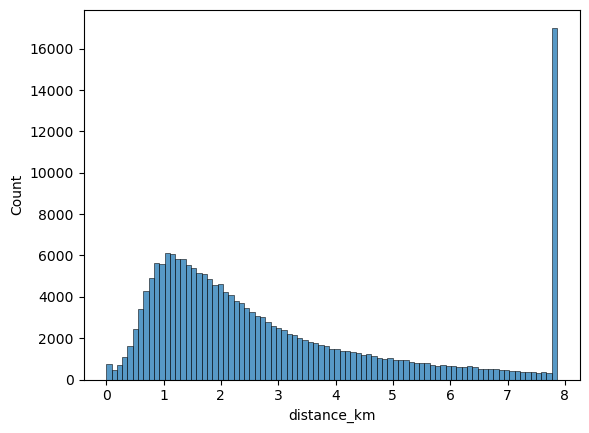

In [59]:
sns.histplot(df['distance_km'])

* Maximum distance_km values are between 7.5 and 8, dropping these values might remove a huge chunk of values from the dataset which might then affect the correlation amtrix and model building. We hence, prevent dropping these values.

In [60]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,3,3,0,1.683323
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,2,4,0,2.457590
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,2,0,1,5.036377
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,2,4,2,1.661683
4,16.00,-73.929788,40.744085,-73.973082,40.761247,3.5,2014,2,3,3,4.475450
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,2012,4,6,6,0.112210
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,2014,3,4,4,1.875050
199997,22.25,-73.986017,40.756487,-73.922037,40.692588,2.0,2009,2,0,4,7.865133
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,2015,3,2,5,3.539715


In [61]:
# reseting the index for the removed outliers data

df=df.reset_index(drop=True)

In [62]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,3,3,0,1.683323
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,2,4,0,2.457590
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,2,0,1,5.036377
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,2,4,2,1.661683
4,16.00,-73.929788,40.744085,-73.973082,40.761247,3.5,2014,2,3,3,4.475450
...,...,...,...,...,...,...,...,...,...,...,...
193713,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,2012,4,6,6,0.112210
193714,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,2014,3,4,4,1.875050
193715,22.25,-73.986017,40.756487,-73.922037,40.692588,2.0,2009,2,0,4,7.865133
193716,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,2015,3,2,5,3.539715


# Correlation Analysis

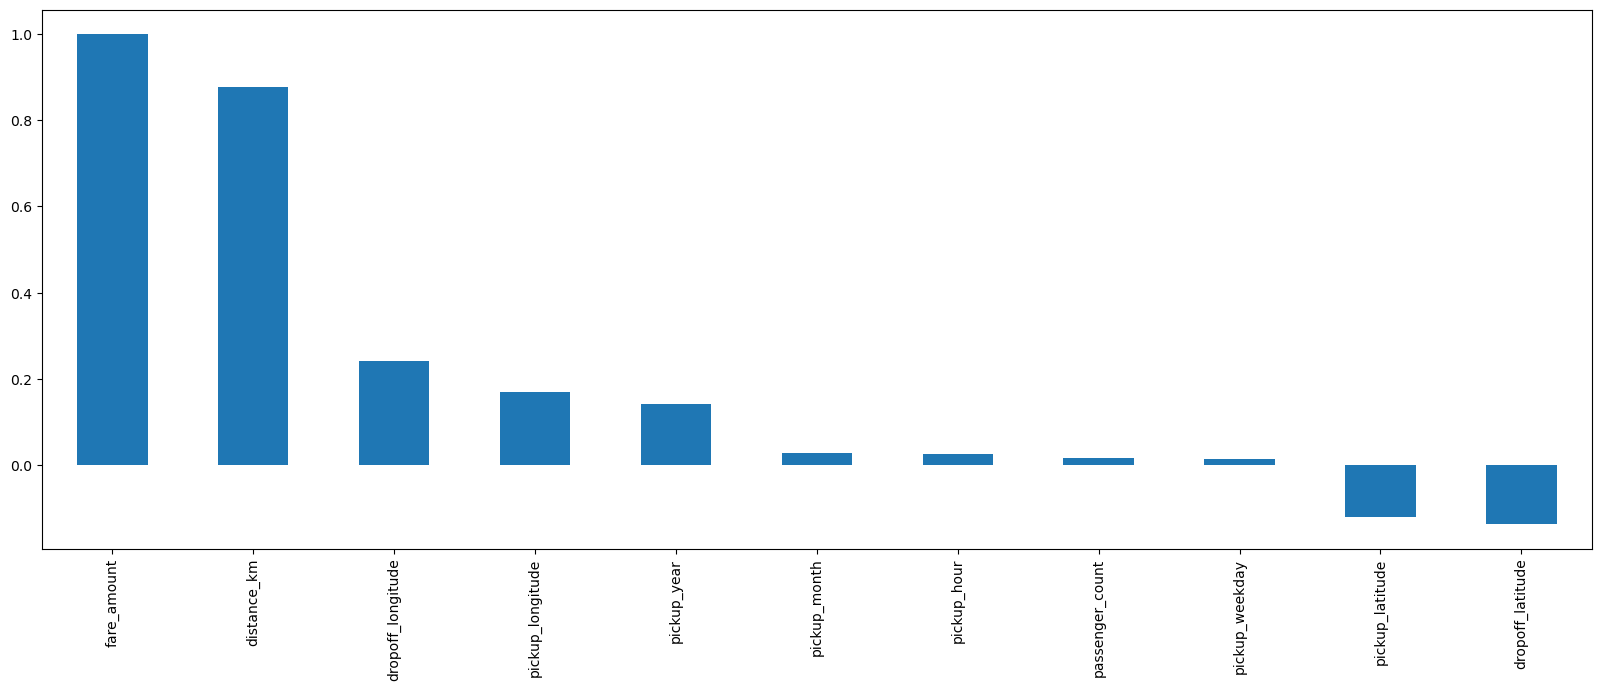

In [63]:
# our target variable 'fare_amount' seems to be highly correlated with 'distance_km', and lessly correlated with 'pickup_year','pickup_month','pickup_hour', and 'passenger_count'.
# From the bar plot - the value closer to -1 and 1 that represents the two variables are highly correlated with each other.
plt.figure(figsize=(20,7))
df.corr()['fare_amount'].sort_values(ascending = False).plot(kind='bar')

plt.show()

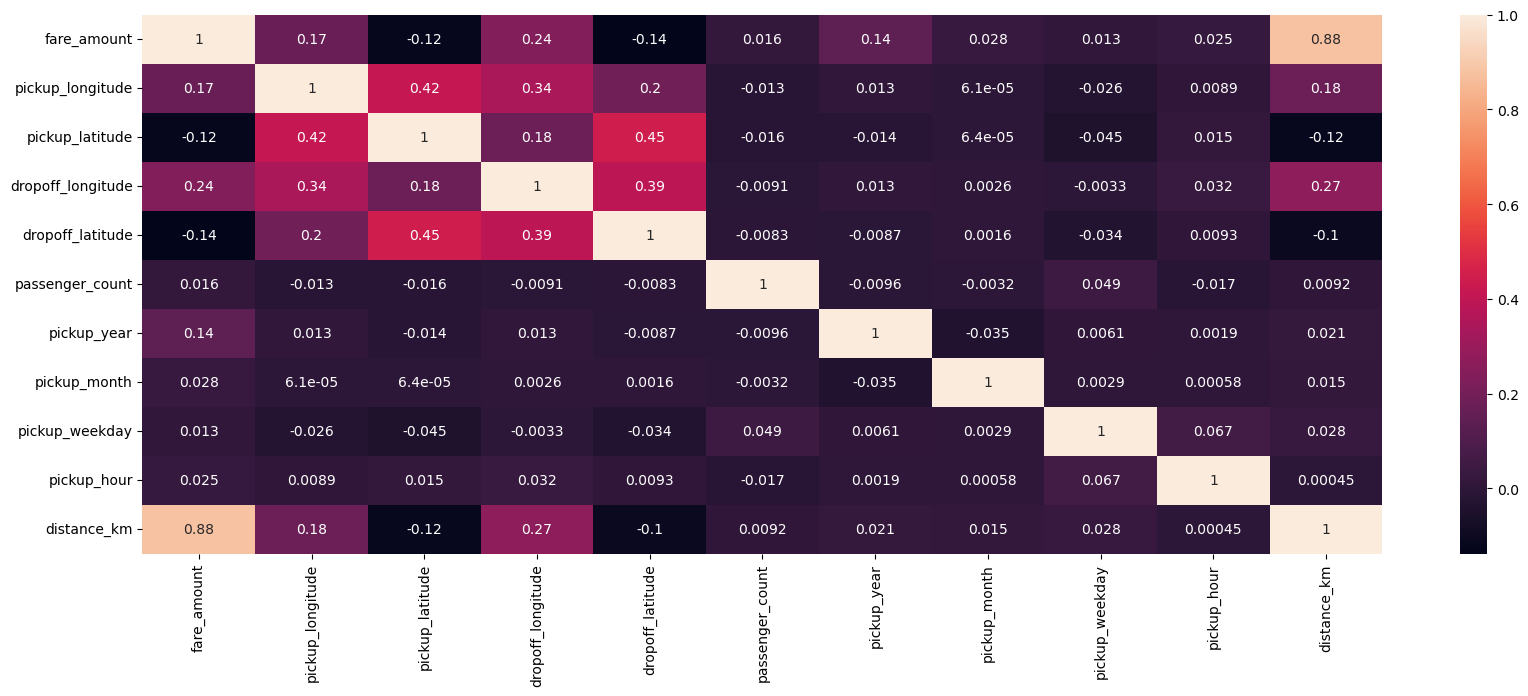

In [64]:
# plotting the correaltion matrix of all the columns in our dataset df.
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

* our target variable 'fare_amount' seems to be highly positively correlated with 'distance_km', and lessly positively correlated with 'pickup_year','pickup_month','pickup_hour', and 'passenger_count'.
* From the bar plot - the value closer to -1 and 1 that represents the two variables are highly correlated with each other.

In [65]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
count,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000
mean,10.122414,-73.979313,40.751396,-73.977294,40.751432,1.515218,2011.747834,2.499685,3.048973,2.983662,2.943069
std,5.423635,0.019467,0.024254,0.021733,0.027312,0.877005,1.859639,1.103430,1.946592,2.219005,2.197959
min,2.900000,-74.029431,40.686251,-74.033029,40.682556,0.000000,2009.000000,1.000000,0.000000,0.000000,0.000084
25%,6.000000,-73.992274,40.736365,-73.991592,40.735252,1.000000,2010.000000,2.000000,1.000000,1.000000,1.287981
50%,8.500000,-73.982118,40.753263,-73.980545,40.753723,1.000000,2012.000000,3.000000,3.000000,3.000000,2.189227
75%,12.500000,-73.968417,40.767527,-73.965455,40.768328,2.000000,2013.000000,3.000000,5.000000,5.000000,3.966106
max,22.250000,-73.929788,40.815702,-73.922037,40.819269,3.500000,2015.000000,4.000000,6.000000,7.000000,7.865133


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193718 entries, 0 to 193717
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193718 non-null  float64
 1   pickup_longitude   193718 non-null  float64
 2   pickup_latitude    193718 non-null  float64
 3   dropoff_longitude  193718 non-null  float64
 4   dropoff_latitude   193718 non-null  float64
 5   passenger_count    193718 non-null  float64
 6   pickup_year        193718 non-null  int32  
 7   pickup_month       193718 non-null  int64  
 8   pickup_weekday     193718 non-null  int32  
 9   pickup_hour        193718 non-null  int64  
 10  distance_km        193718 non-null  float64
dtypes: float64(7), int32(2), int64(2)
memory usage: 14.8 MB


* After taking a final look into the data types of our dataset, all of them are numerical.

## Labeling Categorical Variables

* Converitng numerical columns like 'distance_km', 'pickup_year', 'pickup_month', 'pickup_weekday', 'pickup_hour' into categorical ones since they further will be transformed into dummy variables which will then allows us to build a model with those variables.

##### Variable one: pickup_year

In [67]:
df.loc[:,'pickup_year']= df['pickup_year'].map({2009:'Pickup_Year_2009',2010:'Pickup_Year_2010',2011:'Pickup_Year_2011',2012:'Pickup_Year_2012',2013:'Pickup_Year_2013',2014:'Pickup_Year_2014', 2015:'Pickup_Year_2015'})

##### Variable two: pickup_month

In [68]:
df.loc[:,'pickup_month'] = df['pickup_month'].map({1:'Pickup_Month_Winter',2:'Pickup_Month_Summer', 3:'Pickup_Month_Spring', 4:'Pickup_Month_Autumn'})

##### Variable three: pickup_weekday

In [69]:
df.loc[:,'pickup_weekday'] = df['pickup_weekday'].map({0:'Pickup_Day_Monday',1:'Pickup_Day_Tuesday', 2:'Pickup_Day_Wednesday', 3:'Pickup_Day_Thursday', 4:'Pickup_Day_Friday', 5:'Pickup_Day_Saturday', 6:'Pickup_Day_Sunday'})

##### Variable four: pickup_hour

In [70]:
df.loc[:,'pickup_hour']= df['pickup_hour'].map({0:'Pickup_Hour_Evening_Breeze',1:'Pickup_Hour_Nightfall_Nooka',2:'Pickup_Hour_Sunrise_Shift', 3:'Pickup_Hour_Afternoon_Glide', 4:'Pickup_Hour_Midnight_Owl', 5:'Pickup_Hour_Noon_Tide', 6:'Pickup_Hour_Morning_Rush', 7:'Pickup_Hour_Early_Bird'})

##### Variable five: distance_km

In [71]:
def distance(distance_km):
    if distance_km >= 0 and distance_km <= 2:
        return 'Very_Short_Distance'
    elif distance_km > 2 and distance_km <= 4:
        return 'Short_Distance'
    elif distance_km > 4 and distance_km <= 6:
        return 'Moderate_Distance'
    else:
        return 'Long_Distance'

df.loc[:,'distance_km'] = df['distance_km'].apply(lambda x: distance(x))

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193718 entries, 0 to 193717
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193718 non-null  float64
 1   pickup_longitude   193718 non-null  float64
 2   pickup_latitude    193718 non-null  float64
 3   dropoff_longitude  193718 non-null  float64
 4   dropoff_latitude   193718 non-null  float64
 5   passenger_count    193718 non-null  float64
 6   pickup_year        193718 non-null  object 
 7   pickup_month       193718 non-null  object 
 8   pickup_weekday     193718 non-null  object 
 9   pickup_hour        193718 non-null  object 
 10  distance_km        193718 non-null  object 
dtypes: float64(6), object(5)
memory usage: 16.3+ MB


In [73]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000
mean,10.122414,-73.979313,40.751396,-73.977294,40.751432,1.515218
std,5.423635,0.019467,0.024254,0.021733,0.027312,0.877005
min,2.900000,-74.029431,40.686251,-74.033029,40.682556,0.000000
25%,6.000000,-73.992274,40.736365,-73.991592,40.735252,1.000000
50%,8.500000,-73.982118,40.753263,-73.980545,40.753723,1.000000
75%,12.500000,-73.968417,40.767527,-73.965455,40.768328,2.000000
max,22.250000,-73.929788,40.815702,-73.922037,40.819269,3.500000


### Creating dummy variables for all categorical variables.

* We need to create dummy variables of all the categorical variables because in model building only numerical values are taken. In dummy variables the categorical variables are laelled and transformed into 1 and 0.

##### Variable one: pickup_year

In [74]:
pickup_year_dummy = pd.get_dummies(df.pickup_year, drop_first=True)
pickup_year_dummy = pickup_year_dummy.astype(int)
pickup_year_dummy.head(10)

,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0
8,0,0,0,0,0,1
9,0,1,0,0,0,0


##### Variable two: pickup_month

In [75]:
pickup_month_dummy = pd.get_dummies(df.pickup_month, drop_first=True)
pickup_month_dummy = pickup_month_dummy.astype(int)
pickup_month_dummy.head(10)

,Pickup_Month_Spring,Pickup_Month_Summer,Pickup_Month_Winter
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,0,0
6,0,0,1
7,1,0,0
8,1,0,0
9,1,0,0


##### Variable three: pickup_weekday

In [76]:
pickup_weekday_dummy = pd.get_dummies(df.pickup_weekday, drop_first=True)
pickup_weekday_dummy = pickup_weekday_dummy.astype(int)
pickup_weekday_dummy.head(10)

,Pickup_Day_Monday,Pickup_Day_Saturday,Pickup_Day_Sunday,Pickup_Day_Thursday,Pickup_Day_Tuesday,Pickup_Day_Wednesday
0,0,0,0,1,0,0
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,1,0,0
5,0,0,1,0,0,0
6,0,0,0,0,0,0
7,0,0,0,1,0,0
8,0,0,0,0,0,0
9,0,0,0,0,1,0


##### Variable four: pickup_hour

In [77]:
pickup_hour_dummy = pd.get_dummies(df.pickup_hour, drop_first=True)
pickup_hour_dummy = pickup_hour_dummy.astype(int)
pickup_hour_dummy.head(10)

,Pickup_Hour_Early_Bird,Pickup_Hour_Evening_Breeze,Pickup_Hour_Midnight_Owl,Pickup_Hour_Morning_Rush,Pickup_Hour_Nightfall_Nooka,Pickup_Hour_Noon_Tide,Pickup_Hour_Sunrise_Shift
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1
6,0,0,0,1,0,0,0
7,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0


##### Variable five: distance_km

In [78]:
distance_km_dummy = pd.get_dummies(df.distance_km, drop_first=True)
distance_km_dummy = distance_km_dummy.astype(int)
distance_km_dummy.head(10)

,Moderate_Distance,Short_Distance,Very_Short_Distance
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,0,0
6,0,1,0
7,1,0,0
8,0,1,0
9,0,0,1


In [79]:
df.head(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,Pickup_Year_2015,Pickup_Month_Spring,Pickup_Day_Thursday,Pickup_Hour_Evening_Breeze,Very_Short_Distance
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,Pickup_Year_2009,Pickup_Month_Summer,Pickup_Day_Friday,Pickup_Hour_Evening_Breeze,Short_Distance
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,Pickup_Year_2009,Pickup_Month_Summer,Pickup_Day_Monday,Pickup_Hour_Nightfall_Nooka,Moderate_Distance
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,Pickup_Year_2009,Pickup_Month_Summer,Pickup_Day_Friday,Pickup_Hour_Sunrise_Shift,Very_Short_Distance
4,16.0,-73.929788,40.744085,-73.973082,40.761247,3.5,Pickup_Year_2014,Pickup_Month_Summer,Pickup_Day_Thursday,Pickup_Hour_Afternoon_Glide,Moderate_Distance


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193718 entries, 0 to 193717
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193718 non-null  float64
 1   pickup_longitude   193718 non-null  float64
 2   pickup_latitude    193718 non-null  float64
 3   dropoff_longitude  193718 non-null  float64
 4   dropoff_latitude   193718 non-null  float64
 5   passenger_count    193718 non-null  float64
 6   pickup_year        193718 non-null  object 
 7   pickup_month       193718 non-null  object 
 8   pickup_weekday     193718 non-null  object 
 9   pickup_hour        193718 non-null  object 
 10  distance_km        193718 non-null  object 
dtypes: float64(6), object(5)
memory usage: 16.3+ MB


In [81]:
#creating a fare_amount dataframe
fare_amount = df['fare_amount']

In [82]:
#creating a pickup_longitude dataframe
pickup_longitude = df['pickup_longitude']

In [83]:
#creating a pickup_latitude dataframe
pickup_latitude = df['dropoff_longitude']

In [84]:
#creating a dropoff_latitude dataframe
dropoff_latitude = df['dropoff_latitude']

In [85]:
#creating a dropoff_longitude dataframe
dropoff_longitude = df['dropoff_longitude']

In [86]:
#creating a passenger_count dataframe
passenger_count = df['passenger_count']

In [87]:
# concating the numerical dataframes as one
final_numeric = pd.concat([fare_amount, pickup_longitude, pickup_latitude, dropoff_latitude, dropoff_longitude, passenger_count], axis=1)
final_numeric

,fare_amount,pickup_longitude,dropoff_longitude,dropoff_latitude,dropoff_longitude,passenger_count
0,7.50,-73.999817,-73.999512,40.723217,-73.999512,1.0
1,7.70,-73.994355,-73.994710,40.750325,-73.994710,1.0
2,12.90,-74.005043,-73.962565,40.772647,-73.962565,1.0
3,5.30,-73.976124,-73.965316,40.803349,-73.965316,3.0
4,16.00,-73.929788,-73.973082,40.761247,-73.973082,3.5
...,...,...,...,...,...,...
193713,3.00,-73.987042,-73.986525,40.740297,-73.986525,1.0
193714,7.50,-73.984722,-74.006672,40.739620,-74.006672,1.0
193715,22.25,-73.986017,-73.922037,40.692588,-73.922037,2.0
193716,14.50,-73.997124,-73.983215,40.695415,-73.983215,1.0


In [88]:
# concating the dummy categorical dataframes as one
final_categorical = pd.concat([pickup_year_dummy, pickup_month_dummy, pickup_weekday_dummy, pickup_hour_dummy, distance_km_dummy], axis=1)
final_categorical

,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Month_Spring,Pickup_Month_Summer,Pickup_Month_Winter,Pickup_Day_Monday,...,Pickup_Hour_Early_Bird,Pickup_Hour_Evening_Breeze,Pickup_Hour_Midnight_Owl,Pickup_Hour_Morning_Rush,Pickup_Hour_Nightfall_Nooka,Pickup_Hour_Noon_Tide,Pickup_Hour_Sunrise_Shift,Moderate_Distance,Short_Distance,Very_Short_Distance
0,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193713,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
193714,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
193715,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
193716,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [89]:
# concating all the the categorical dummy dataframes and numerical dataframes together
final_data = pd.concat([fare_amount, pickup_year_dummy, pickup_month_dummy, pickup_weekday_dummy, pickup_hour_dummy, distance_km_dummy, passenger_count, pickup_longitude, pickup_latitude, dropoff_latitude, dropoff_longitude], axis = 1)
final_data

,fare_amount,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Month_Spring,Pickup_Month_Summer,Pickup_Month_Winter,...,Pickup_Hour_Noon_Tide,Pickup_Hour_Sunrise_Shift,Moderate_Distance,Short_Distance,Very_Short_Distance,passenger_count,pickup_longitude,dropoff_longitude,dropoff_latitude,dropoff_longitude
0,7.50,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,1.0,-73.999817,-73.999512,40.723217,-73.999512
1,7.70,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1.0,-73.994355,-73.994710,40.750325,-73.994710
2,12.90,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1.0,-74.005043,-73.962565,40.772647,-73.962565
3,5.30,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,3.0,-73.976124,-73.965316,40.803349,-73.965316
4,16.00,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,3.5,-73.929788,-73.973082,40.761247,-73.973082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193713,3.00,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1.0,-73.987042,-73.986525,40.740297,-73.986525
193714,7.50,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,1.0,-73.984722,-74.006672,40.739620,-74.006672
193715,22.25,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,2.0,-73.986017,-73.922037,40.692588,-73.922037
193716,14.50,0,0,0,0,0,1,1,0,0,...,1,0,0,1,0,1.0,-73.997124,-73.983215,40.695415,-73.983215


In [90]:
final_data.shape

(193718, 31)

* After the concatination the total number of rows in the dataset are 193718 and columns are 31.

### Splitting data into Train and Test

In [91]:
#importing relevant packages

import sklearn
from sklearn.model_selection import train_test_split

In [92]:
# dividing the data into train and test split

final_train, final_test = train_test_split(final_data, train_size = 0.7, random_state = 365)

* I have divided the dataset into 70-30 ratio where 70% of the original dataset will be used for training the model and the remaining 30% will be used for testing the model.

In [93]:
final_train.shape

(135602, 31)

* In the train set there are 135602 rows and 31 columns.

In [94]:
final_test.shape

(58116, 31)

* In the test set there are 58116 rows and 31 columns.

### Performing rescaling of numeric values

* In the model building process, I performed rescaling of numeric values to standardize the features of the dataset we have. We imported the StandardScaler from scikit-learn, as it removes the mean and scales each feature/variable to unit variance. 

* This is an essential preprocessing step because it ensures that each feature contributes equally to the distance computations in models that are sensitive to the scale of the data. Standardizing the data can result in better performance as it can make the training process faster and reduce the chances of getting stuck in local optima.

In [95]:
#importing relevant packages

from sklearn.preprocessing import StandardScaler

In [96]:
# Initialize the scaler
scaler = StandardScaler()

In [97]:
#creating a list of numeric variables

numeric = ['fare_amount', 'pickup_longitude', 'dropoff_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count']

In [98]:
# Fit the scaler on the training set (only for numeric features)
scaler.fit(final_train[numeric])

StandardScaler()

In [99]:
# Transform the training set
final_train[numeric] = scaler.transform(final_train[numeric])

* Here, I have done rescalling of numerica variables in the train set. I'll be seperately performing rescalling of numeri variables in the test set.

In [100]:
final_train.head()

,fare_amount,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Month_Spring,Pickup_Month_Summer,Pickup_Month_Winter,...,Pickup_Hour_Noon_Tide,Pickup_Hour_Sunrise_Shift,Moderate_Distance,Short_Distance,Very_Short_Distance,passenger_count,pickup_longitude,dropoff_longitude,dropoff_latitude,dropoff_longitude
53740,-1.037959,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,-0.587821,-1.291868,-1.271978,-0.584027,-1.271978
36019,-0.945714,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,-0.587821,-1.656052,-1.722829,-1.361593,-1.722829
106167,1.268168,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,-0.587821,-1.112396,0.830647,0.587757,0.830647
181197,1.360413,0,0,0,0,0,1,1,0,0,...,0,1,1,0,0,-0.587821,-1.360967,0.138578,0.277951,0.138578
113209,1.692496,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0.551801,-1.473755,-1.817989,-1.551912,-1.817989


In [101]:
final_train.describe()

,fare_amount,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Month_Spring,Pickup_Month_Summer,Pickup_Month_Winter,...,Pickup_Hour_Noon_Tide,Pickup_Hour_Sunrise_Shift,Moderate_Distance,Short_Distance,Very_Short_Distance,passenger_count,pickup_longitude,dropoff_longitude,dropoff_latitude,dropoff_longitude
count,1.356020e+05,135602.000000,135602.000000,135602.000000,135602.000000,135602.000000,135602.000000,135602.000000,135602.000000,135602.000000,...,135602.000000,135602.000000,135602.000000,135602.000000,135602.000000,1.356020e+05,1.356020e+05,1.356020e+05,1.356020e+05,1.356020e+05
mean,3.130848e-17,0.149172,0.159009,0.160256,0.157608,0.150308,0.069925,0.281530,0.234495,0.250129,...,0.148729,0.102049,0.113597,0.296633,0.455369,-2.965791e-17,-2.805499e-13,-3.326578e-13,4.328441e-14,-3.326578e-13
std,1.000004e+00,0.356259,0.365686,0.366844,0.364375,0.357374,0.255022,0.449747,0.423684,0.433089,...,0.355823,0.302713,0.317323,0.456775,0.498006,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.333143e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.727443e+00,-2.573758e+00,-2.561168e+00,-2.518737e+00,-2.561168e+00
25%,-7.612236e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-5.878209e-01,-6.664094e-01,-6.571804e-01,-5.932600e-01,-6.571804e-01
50%,-2.999981e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-5.878209e-01,-1.446801e-01,-1.486633e-01,8.476377e-02,-1.486633e-01
75%,4.379626e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,5.518007e-01,5.595361e-01,5.418577e-01,6.185007e-01,5.418577e-01
max,2.236742e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.261233e+00,2.543041e+00,2.538800e+00,2.484939e+00,2.538800e+00
